In [84]:
import pandas as pd

In [155]:
import jupyter_dash

In [156]:
import numpy as np

In [87]:
import csv

In [88]:
import matplotlib.pyplot as plt

In [89]:
import plotly.express as px

In [90]:
import seaborn as sb

In [91]:
import plotly.graph_objects as go

In [92]:
import cufflinks as cf

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
import ipywidgets as widgets

In [96]:
%matplotlib inline
cf.go_offline()

In [97]:
sold = pd.read_csv("C964Data.csv")

In [98]:
sold1 = pd.read_csv("C964SoldPercent.csv")

In [99]:
train = pd.read_csv("C964Predict.csv")

In [100]:
cRate = pd.read_csv("C964Rate.csv")

In [101]:
trainS = pd.read_csv("C964PredictSale.csv")

In [102]:
trainA = pd.read_csv("C964PredictAll.csv")

In [103]:
import ipywidgets

In [104]:
import logging
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='mylog.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)

In [164]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,ipywidgets,numpy,sklearn,plotly,seaborn,matplotlib,cufflinks,csv,jupyter_dash,watermark 

# date
print (" ")
%watermark -u -n -t -z 

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.4.0

pandas      : 1.4.2
ipywidgets  : 7.7.0
numpy       : 1.22.4
sklearn     : 0.0
plotly      : 5.8.2
seaborn     : 0.11.2
matplotlib  : 3.5.2
cufflinks   : 0.17.3
csv         : 1.0
jupyter_dash: 0.4.2
watermark   : 2.3.1

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : AMD64 Family 23 Model 113 Stepping 0, AuthenticAMD
CPU cores   : 12
Architecture: 64bit

 
Last updated: Sun Jun 19 2022 20:34:20Eastern Daylight Time



In [105]:
rate = pd.read_csv("C964Rate.csv")

In [106]:
percent = pd.read_csv("C964Percent.csv")

In [107]:
percent1 = pd.read_csv("C964Percent1.csv")

In [108]:
cRate1 = pd.read_csv("MonthColRate1.csv")

In [109]:
train.head(12)

,2018,2019,2020,2021,2022,2018Pred,2019Pred,2020Pred,2021Pred,2022Pred,2018Rate,2019Rate,2020Rate,2021Rate,2022Rate
0,95.1,94.3,96.9,100.3,107.2,0,0,0,1,1.0,4.03,4.46,3.62,2.74,3.45
1,96.7,96.3,97.4,108.4,107.9,0,0,0,1,1.0,4.33,4.37,3.47,2.81,3.76
2,95.1,98.4,99.2,106.2,97.0,0,0,0,1,0.0,4.44,4.27,3.45,3.08,4.17
3,95.4,102.1,105.3,104.6,93.7,0,1,1,1,0.0,4.47,4.14,3.31,3.06,4.98
4,100.7,102.4,99.2,101.6,NaN,1,1,0,1,NaN,4.59,4.07,3.23,2.96,5.23
5,101.6,99.0,103.6,98.6,NaN,1,0,1,0,NaN,4.57,3.80,3.16,2.98,NaN
6,101.6,100.4,106.5,96.4,NaN,1,1,1,0,NaN,4.53,3.77,3.02,2.87,NaN
7,101.7,103.1,105.8,94.3,NaN,1,1,1,0,NaN,4.55,3.62,2.94,2.84,NaN
8,101.7,103.0,105.6,101.7,NaN,1,1,1,1,NaN,4.63,3.61,2.89,2.90,NaN
9,98.0,99.3,102.1,99.5,NaN,0,0,1,0,NaN,4.83,3.69,2.83,3.07,NaN


In [110]:
#sold.head()

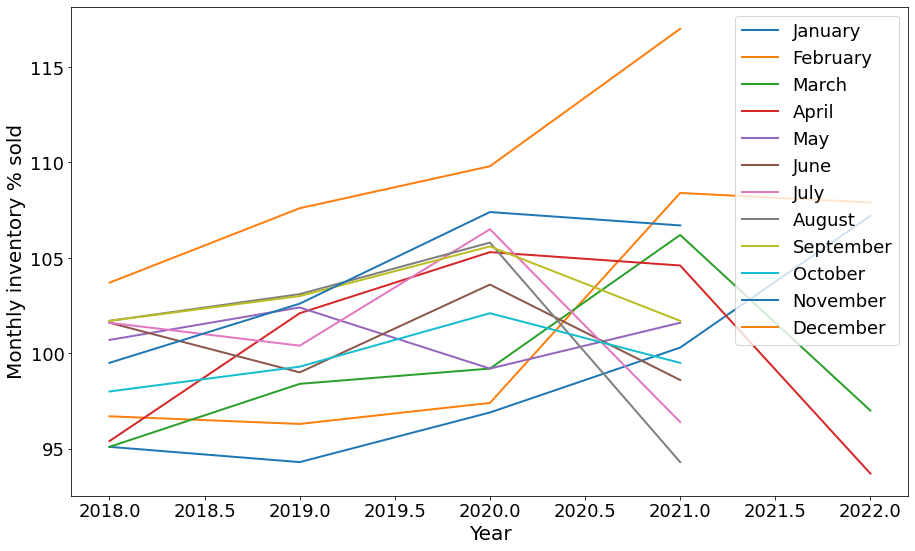

In [111]:
try:
    plt.rcParams['figure.figsize'] = (15, 9)

# No need of this statement for each graph: plt.figure(figsize=[15, 9])
    x = [2018,2019,2020,2021,2022]
    for col in percent1.columns:
        plt.plot(x,percent1[col], linewidth=2, label=col)
        
    
    plt.xlabel('Year', fontsize=20)
    plt.ylabel('Monthly inventory % sold', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(fontsize=18)
    plt.show()
    5/0
    
    
except Exception as e:
    logger.critical(e)
   

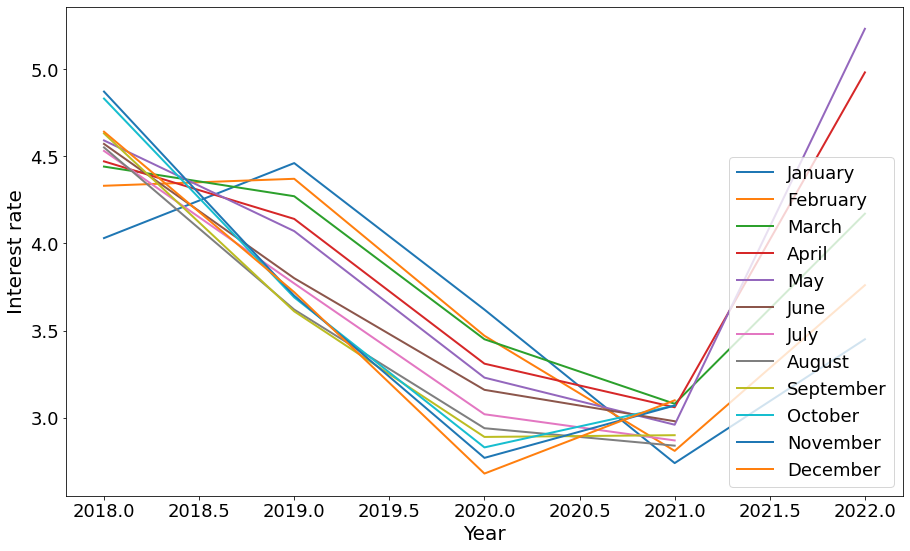

In [112]:
plt.rcParams['figure.figsize'] = (15, 9)

# No need of this statement for each graph: plt.figure(figsize=[15, 9])

x = [2018,2019,2020,2021,2022]

for col in rate.columns:
        plt.plot(x,rate[col], linewidth=2, label=col)

plt.xlabel('Year', fontsize=20)
plt.ylabel('Interest rate', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
#plt.set_cmap('Paired') # You can set the colormap to the graph
plt.show()


In [113]:
# Converting the Date column to the datestamp type
sold['Month'] = pd.to_datetime(sold['Month'])

# Sorting data in ascending order by the date
sold = sold.sort_values(by='Month')

# Now, setting the Date column as the index of the dataframe
sold.set_index('Month', inplace=True)

# Print the new dataframe and its summary
print(sold.head(), sold.describe(), sep='\n\n')

                               January  February  March  April   May  June  \
Month                                                                        
1970-01-01 00:00:00.000002018     4.03      4.33   4.44   4.47  4.59  4.57   
1970-01-01 00:00:00.000002019     4.46      4.37   4.27   4.14  4.07  3.80   
1970-01-01 00:00:00.000002020     3.62      3.47   3.45   3.31  3.23  3.16   
1970-01-01 00:00:00.000002021     2.74      2.81   3.08   3.06  2.96  2.98   
1970-01-01 00:00:00.000002022     3.45      3.76   4.17   4.98  5.23   NaN   

                               July  August  September  October  ...  MarchP  \
Month                                                            ...           
1970-01-01 00:00:00.000002018  4.53    4.55       4.63     4.83  ...    95.1   
1970-01-01 00:00:00.000002019  3.77    3.62       3.61     3.69  ...    98.4   
1970-01-01 00:00:00.000002020  3.02    2.94       2.89     2.83  ...    99.2   
1970-01-01 00:00:00.000002021  2.87    2.84       2.9

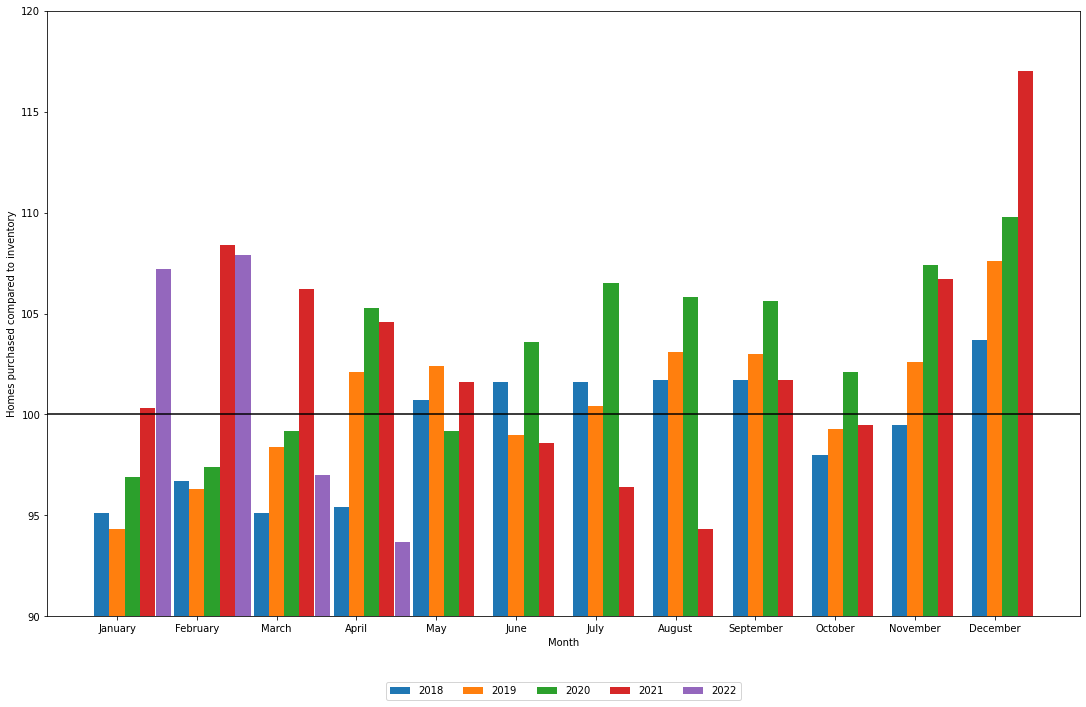

In [114]:
names = sold1['Month'].values
x = np.arange(len(names))
w = 0.19
y = 0.2
plt.axhline(y=100, color = 'Black', linestyle ='-')
plt.bar(x-w, sold1['2018'].values, width=w, label='2018')
plt.bar(x, sold1['2019'].values, width=w, label='2019')
plt.bar(x+w, sold1['2020'].values, width=w, label='2020')
plt.bar(x+w+w, sold1['2021'].values, width=w, label='2021')
plt.bar(x+w+y+w, sold1['2022'].values, width=w, label='2022')
#plt.plot(x, df['Target'].values, lw=2, label='Target')
plt.xticks(x, names)
plt.ylim([90,120])
plt.tight_layout()
plt.xlabel('Month')
plt.ylabel('Homes purchased compared to inventory')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, ncol=5)
plt.savefig("CSVBarplots.png", bbox_inches="tight")
plt.show()

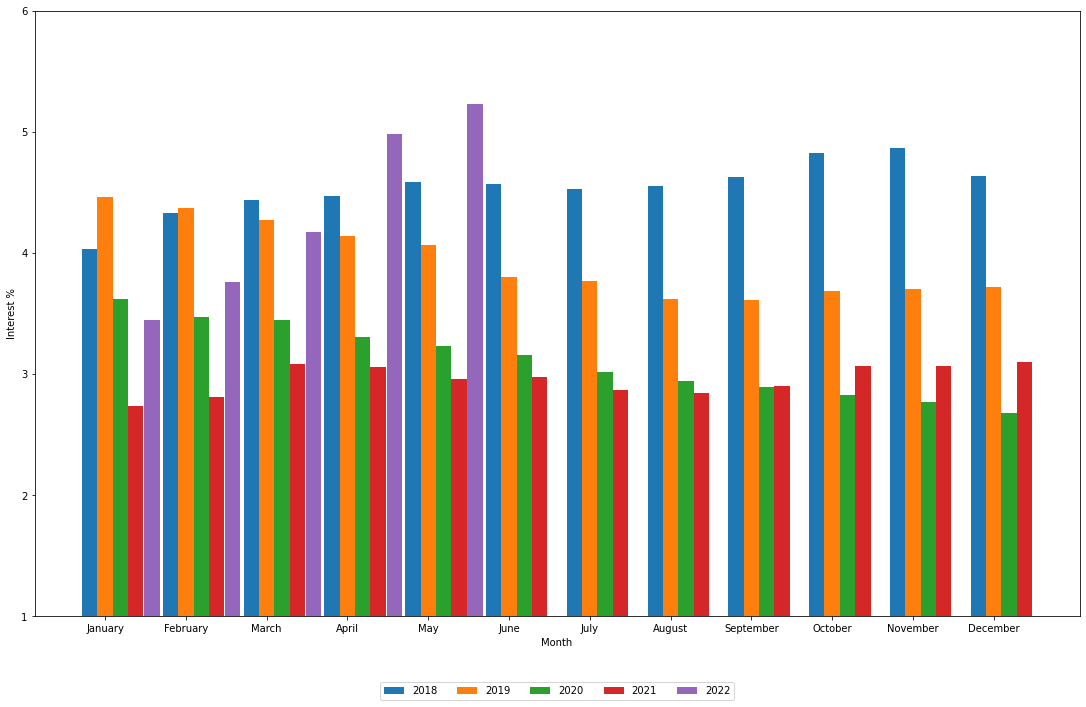

In [115]:
names = cRate1['Month'].values
x = np.arange(len(names))
w = 0.19
y = 0.2
plt.bar(x-w, cRate1['2018'].values, width=w, label='2018')
plt.bar(x, cRate1['2019'].values, width=w, label='2019')
plt.bar(x+w, cRate1['2020'].values, width=w, label='2020')
plt.bar(x+w+w, cRate1['2021'].values, width=w, label='2021')
plt.bar(x+w+y+w, cRate1['2022'].values, width=w, label='2022')
#plt.plot(x, df['Target'].values, lw=2, label='Target')
plt.xticks(x, names)
plt.ylim([1,6])
plt.tight_layout()
plt.xlabel('Month')
plt.ylabel('Interest %')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, ncol=5)
plt.savefig("CSVBarplots.png", bbox_inches="tight")
plt.show()

<AxesSubplot:>

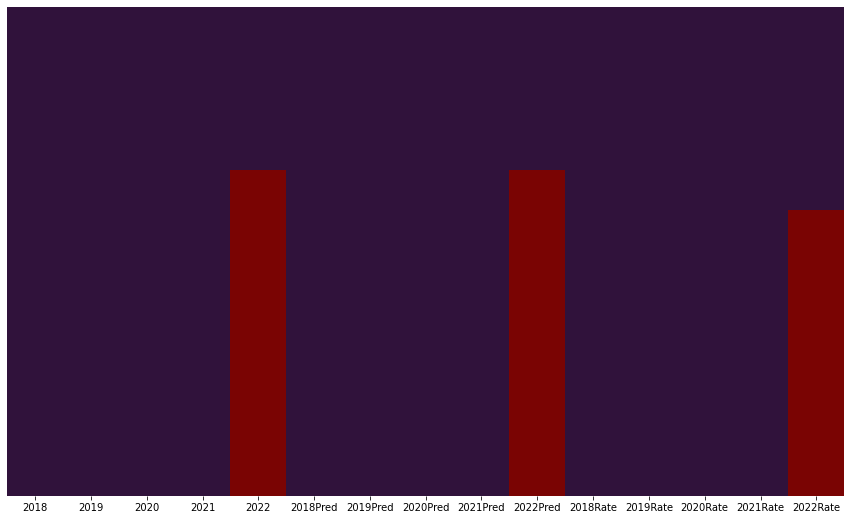

In [116]:
sb.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='turbo')

In [160]:
trainS['Rate'].iplot(kind='hist', bins=50)

<AxesSubplot:xlabel='Sale', ylabel='Rate'>

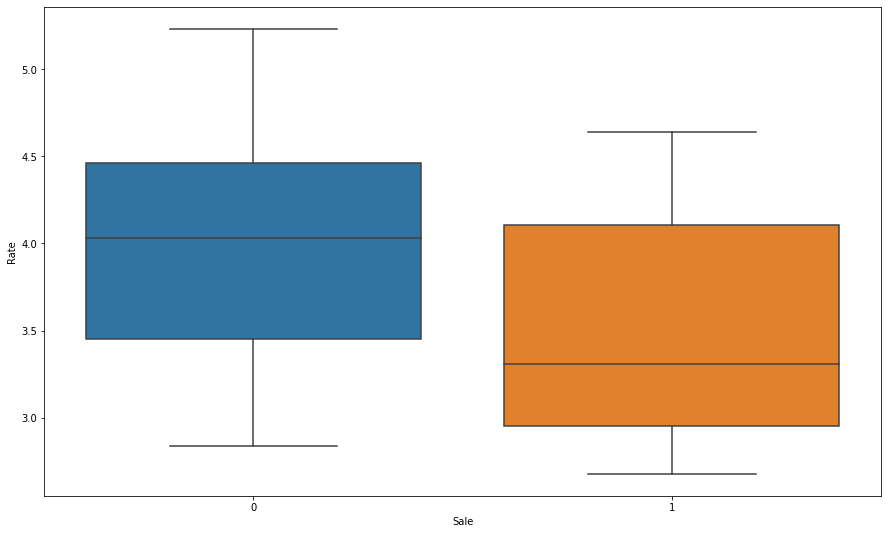

In [118]:

sb.boxplot(x='Sale',y='Rate',data=trainS)

In [119]:
X = trainS.drop('Sale', axis = 1)
y = trainS['Sale']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=10)

In [121]:
#logistic regression
logmodel = LogisticRegression()

In [122]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [123]:
predictions = logmodel.predict(X_test)

In [124]:
print(logmodelAccuracy(

SyntaxError: incomplete input (2870869340.py, line 1)

In [125]:
from sklearn.metrics import classification_report

In [126]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.75      0.75      0.75        12

    accuracy                           0.67        18
   macro avg       0.62      0.62      0.62        18
weighted avg       0.67      0.67      0.67        18



In [127]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)

In [128]:
y1 = (confusion_matrix(y_test,predictions))

<AxesSubplot:>

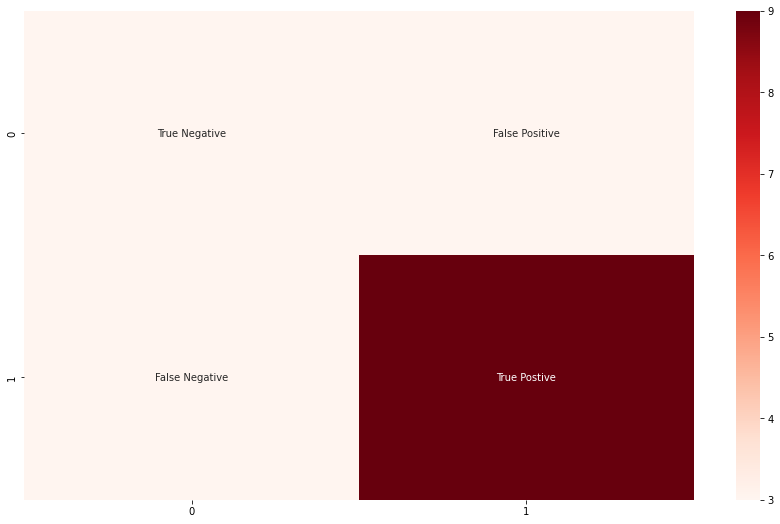

In [129]:
labels = ['True Negative', 'False Positive', 'False Negative', 'True Postive']
labels = np.array(labels).reshape(2,2)
sb.heatmap(y1, annot = labels,fmt='', cmap = 'Reds')

In [131]:
#model = linear_model.LogisticRegression().fit(X_train, y_train)
#y_predict = model.predict(X_test)
#logmodel.fit(X,np.ravel(y.astype(int)))
#plt.scatter(X,y)
#print(X), print(y)

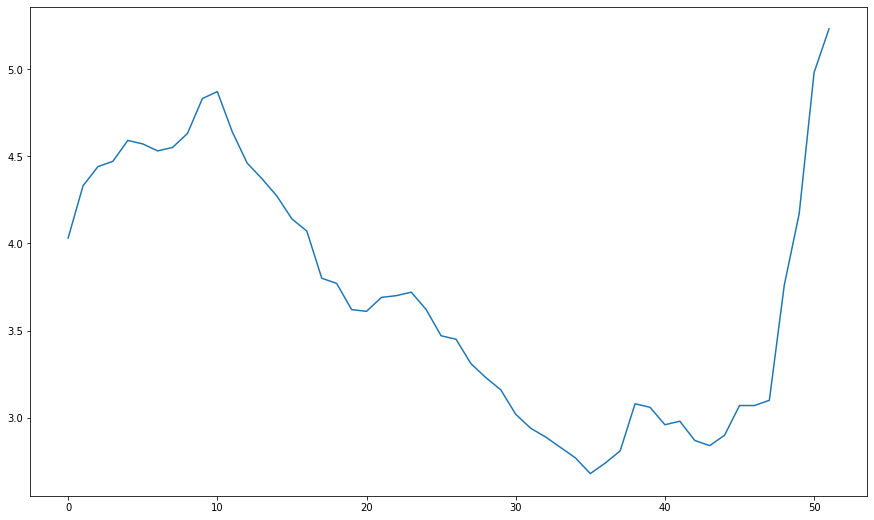

In [132]:
plt.plot(trainS["Rate"],label='Close Price history')

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [135]:
predictions = lm.predict(X_test)

In [136]:
print(lm.intercept_)

1.319019709091397


In [137]:
X.columns

Index(['Rate'], dtype='object')

In [138]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Rate'])
ranked_suburbs = coeff_df.sort_values("Rate", ascending = False)
ranked_suburbs

,Rate
Rate,-0.202053


(2.0, 10.0)

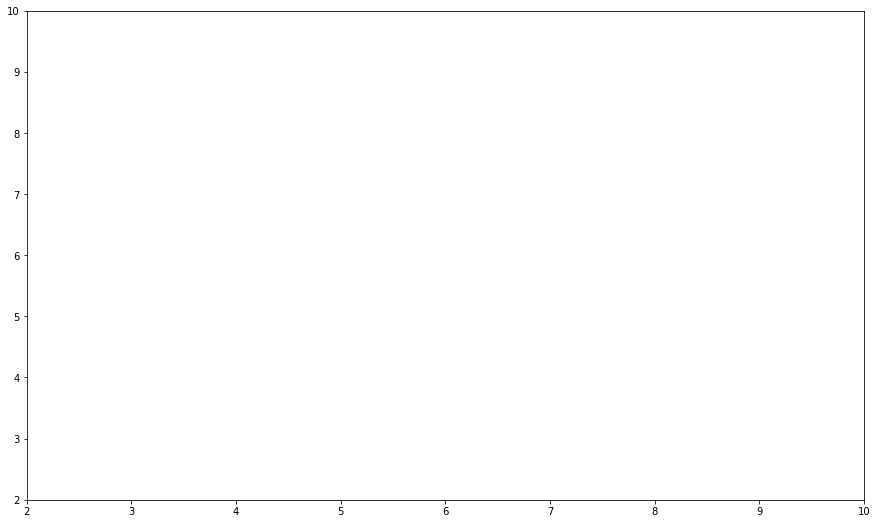

In [139]:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.ylim([2,10])
plt.xlim([2,10])

C:\Users\ricky\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Sale', ylabel='Density'>

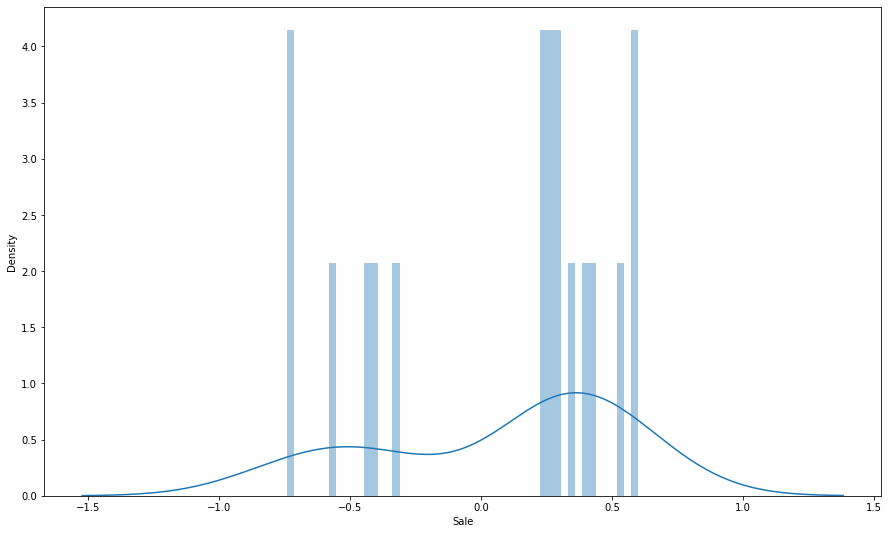

In [140]:
sb.distplot((y_test-predictions),bins=50)

In [141]:
from sklearn import linear_model

In [143]:
regression_model = linear_model.LinearRegression()
regression_model.fit(X = pd.DataFrame(trainA["Percent"]), 
                     y = trainA["Rate"])

LinearRegression()

In [144]:
train_prediction = regression_model.predict(X = pd.DataFrame(trainA["Percent"]))

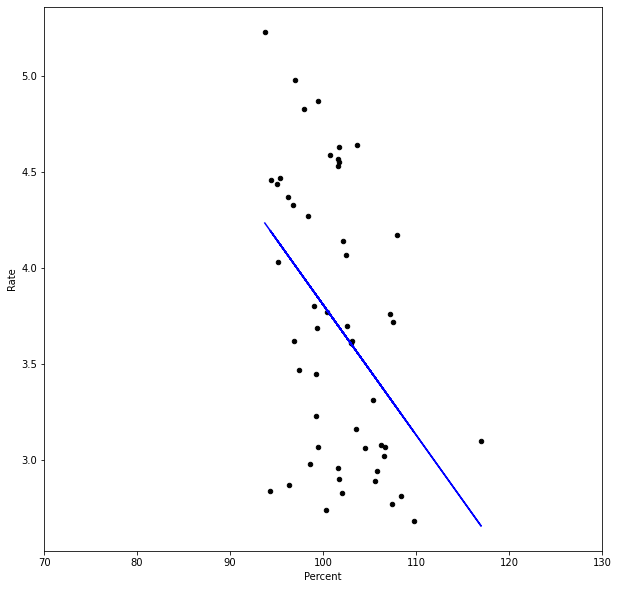

In [145]:
trainA.plot(kind="scatter",
           x="Percent",
           y="Rate",
           figsize=(10,10),
           color="black",
           xlim = (70,130))

# Plot regression line
plt.plot(trainA["Percent"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue");

In [148]:
jM = cRate['January'].mean()
fM = cRate['February'].mean()
mM = cRate['March'].mean()
aM = cRate['April'].mean()
maM = cRate['May'].mean()
juM = cRate['June'].mean()
julM = cRate['July'].mean()
auM = cRate['August'].mean()
sM = cRate['September'].mean()
oM = cRate['October'].mean()
nM = cRate['September'].mean()
dM = cRate['December'].mean()

In [149]:
eL = sold1['2018'].min()
eH = sold1['2018'].max()
nL = sold1['2019'].min()
nH = sold1['2019'].max()
tL = sold1['2020'].min()
tH = sold1['2020'].max()
toL = sold1['2021'].min()
toH = sold1['2021'].max()
ttL = sold1['2022'].min()
ttH = sold1['2022'].max()
eM = train['2018Rate'].mean()
nM = train['2019Rate'].mean()
tM = train['2020Rate'].mean()
toM = train['2021Rate'].mean()
ttM = train['2022Rate'].mean()


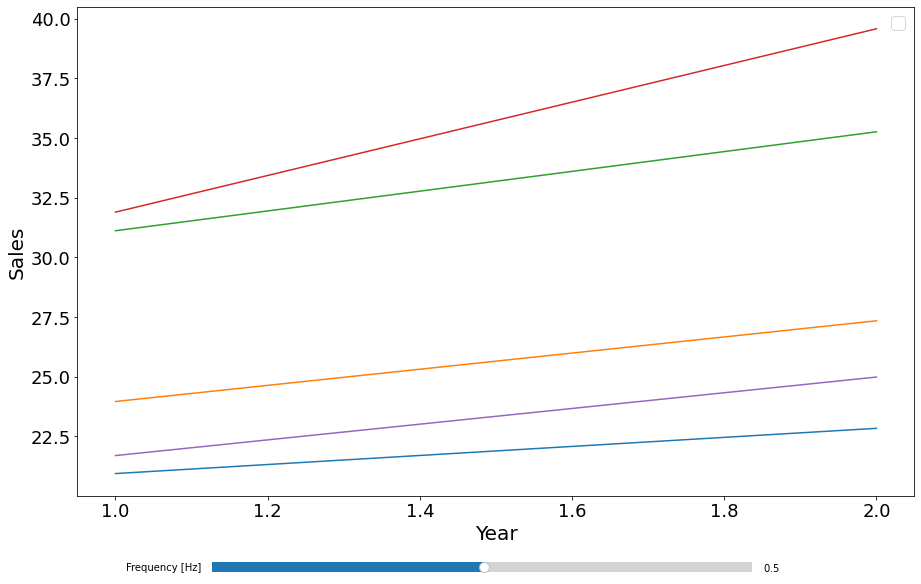

In [157]:
import dash
import ipywidgets
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
from ipywidgets import widgets
from matplotlib import pyplot as plt
import numpy as np
#import bar
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
sold1 = pd.read_csv("C964SoldPercent.csv")
cRate = pd.read_csv("C964Rate.csv")
train = pd.read_csv("C964Predict.csv")
jM = cRate['January'].mean()
fM = cRate['February'].mean()
mM = cRate['March'].mean()
aM = cRate['April'].mean()
maM = cRate['May'].mean()
juM = cRate['June'].mean()
julM = cRate['July'].mean()
auM = cRate['August'].mean()
sM = cRate['September'].mean()
oM = cRate['October'].mean()
nM = cRate['September'].mean()
dM = cRate['December'].mean()
eL = sold1['2018'].min()
eH = sold1['2018'].max()
nL = sold1['2019'].min()
nH = sold1['2019'].max()
tL = sold1['2020'].min()
tH = sold1['2020'].max()
toL = sold1['2021'].min()
toH = sold1['2021'].max()
ttL = sold1['2022'].min()
ttH = sold1['2022'].max()
eM = train['2018Rate'].mean()
nM = train['2019Rate'].mean()
tM = train['2020Rate'].mean()
toM = train['2021Rate'].mean()
ttM = train['2022Rate'].mean()
# print(nL, nH)

eL = eL / eM
eH = eH / eM
nL = nL / nM
nH = nH / nM
tL = tL / tM
tH = tH / tM
toL = toL / toM
toH = toH / toM
ttL = ttL / ttM
ttH = ttH / ttM
fig, ax = plt.subplots()
# No need of this statement for each graph: plt.figure(figsize=[15, 9])

def square(v):
    return v + v


#def slide(iR):
    #ao = (((w1.value / 100) * iR) + iR)

    #return ao
t = np.linspace(0, 1, 1000)

a = [eL, eH]
b = [nL, nH]
c = [tL, tH]
d = [toL, toH]
e = [ttL, ttH]
f = [1, 2]
h = [1, 2]
j = [1, 2]
k = [1, 2]
l = [1, 2]

aa, = plt.plot(f, a)
bb, = plt.plot(h, b)
cc, = plt.plot(j, c)
dd, = plt.plot(k, d)
ee, = plt.plot(l, e)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
axfreq = plt.axes([0.25, 0.0, 0.50, 0.03])
w1 = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=-99,
    valmax=99,
    #valinit=init_frequency,
)

#ipywidgets.interact(slide, iR=w1)
# The function to be called anytime a slider's value changes
def update(val):
    val = val / 100
    eL = sold1['2018'].min()
    eH = sold1['2018'].max()
    nL = sold1['2019'].min()
    nH = sold1['2019'].max()
    tL = sold1['2020'].min()
    tH = sold1['2020'].max()
    toL = sold1['2021'].min()
    toH = sold1['2021'].max()
    ttL = sold1['2022'].min()
    ttH = sold1['2022'].max()
    eM = train['2018Rate'].mean()
    nM = train['2019Rate'].mean()
    tM = train['2020Rate'].mean()
    toM = train['2021Rate'].mean()
    ttM = train['2022Rate'].mean()
    eL = eL / eM
    eH = eH / eM
    nL = nL / nM
    nH = nH / nM
    tL = tL / tM
    tH = tH / tM
    toL = toL / toM
    toH = toH / toM
    ttL = ttL / ttM
    ttH = ttH / ttM
    aa.set_data(f, (val + eL, val + eH))
    bb.set_data(f, (val + nL, val + nH))
    cc.set_data(f, (val + tL, val + tH))
    dd.set_data(f, (val + toL, val + toH))
    ee.set_data(f, (val + ttL, val + ttH))
    fig.canvas.draw_idle()
    #line1.set_ydata(f(t, amp_slider.val+val, freq_slider.val+val))

    print(val)



# register the update function with each slider
w1.on_changed(update)

#freq_slider.on_changed(update1)
#amp_slider.on_changed(update1)

# w1.update_layout()
plt.show()
